In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

### About Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


id and Unnamed: 32 columns are not needed. So, we will drop them!

In [3]:
drop = ['id', 'Unnamed: 32']
data.drop(drop, axis = 1, inplace = True)

In [4]:
data.iloc[0]

diagnosis                         M
radius_mean                   17.99
texture_mean                  10.38
perimeter_mean                122.8
area_mean                      1001
smoothness_mean              0.1184
compactness_mean             0.2776
concavity_mean               0.3001
concave points_mean          0.1471
symmetry_mean                0.2419
fractal_dimension_mean      0.07871
radius_se                     1.095
texture_se                   0.9053
perimeter_se                  8.589
area_se                       153.4
smoothness_se              0.006399
compactness_se              0.04904
concavity_se                0.05373
concave points_se           0.01587
symmetry_se                 0.03003
fractal_dimension_se       0.006193
radius_worst                  25.38
texture_worst                 17.33
perimeter_worst               184.6
area_worst                     2019
smoothness_worst             0.1622
compactness_worst            0.6656
concavity_worst             

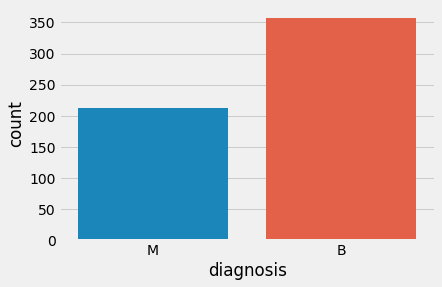

In [5]:
sns.countplot(data['diagnosis']);

As we can see, probabilty of tumor being Benign is higher than probabilty of tumor being Malignant.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 n

I want to convert my values in diagnosis into 0 and 1 according to their type of tumor. I will use Label Encoder for that.

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label_encode = LabelEncoder()
data['diagnosis'] = label_encode.fit_transform(data['diagnosis'])

### Malignant : 1
### Bening : 0

In [9]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


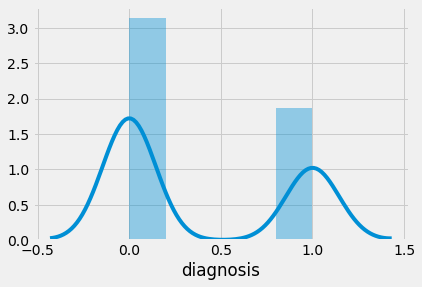

In [10]:
sns.distplot(data['diagnosis']);

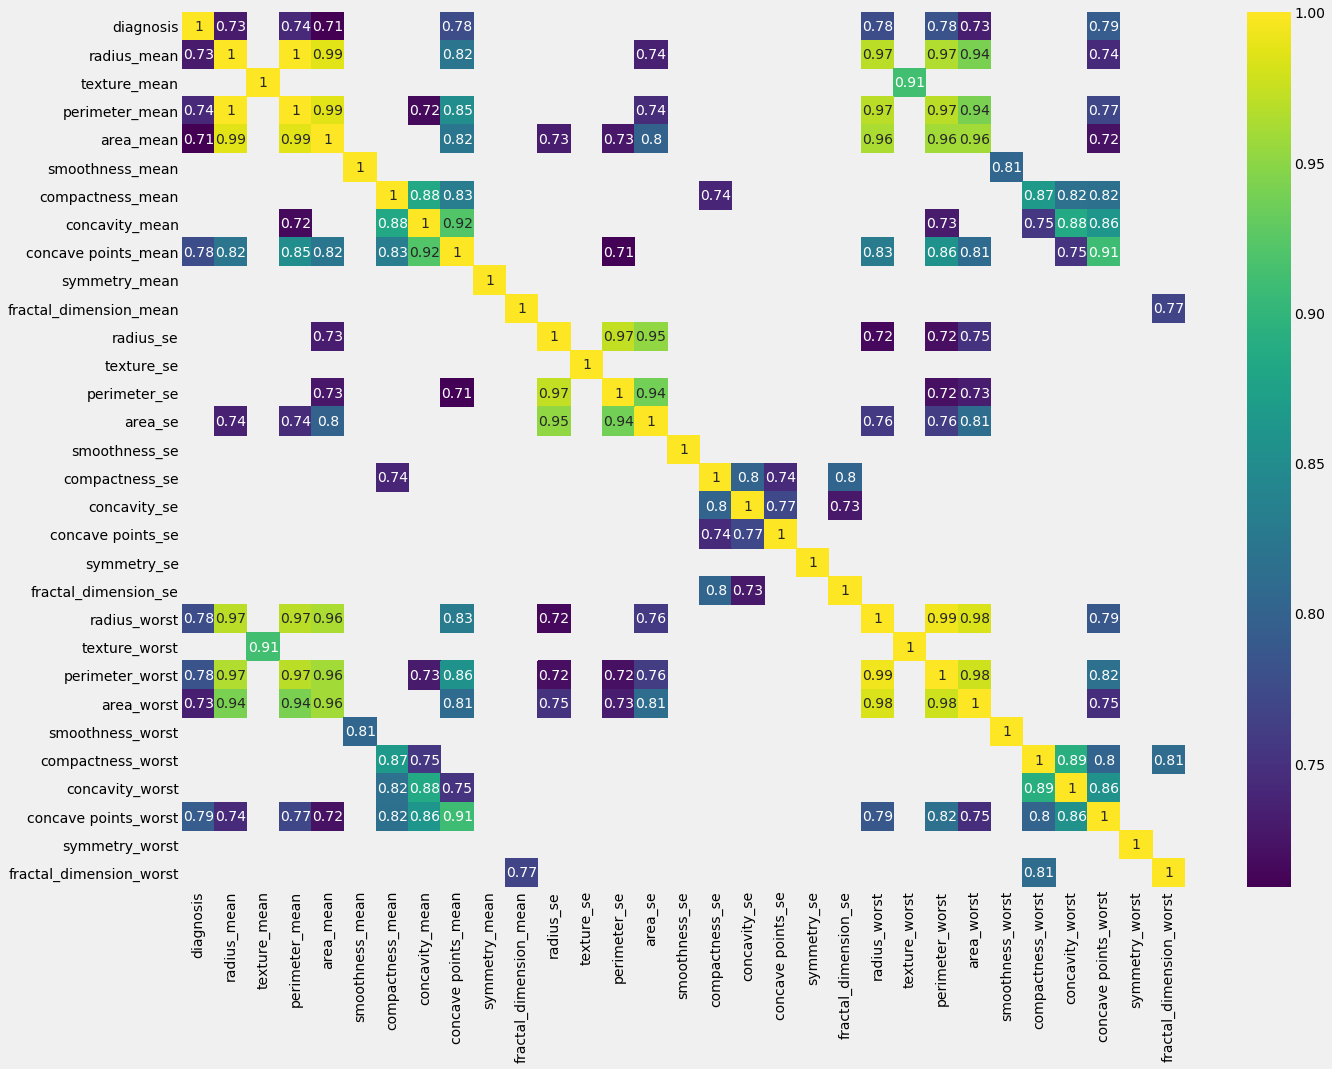

In [11]:
diag_corr = data.corr()
plt.figure(figsize = (20, 15))
a = diag_corr[diag_corr > 0.70]
sns.heatmap(a, annot = True, cmap = 'viridis');

High corelation between diagnosis, and concave points_mean, area_worst, premeter_worst, radius_worst, area_mean, perimeter_mean, radius_mean.

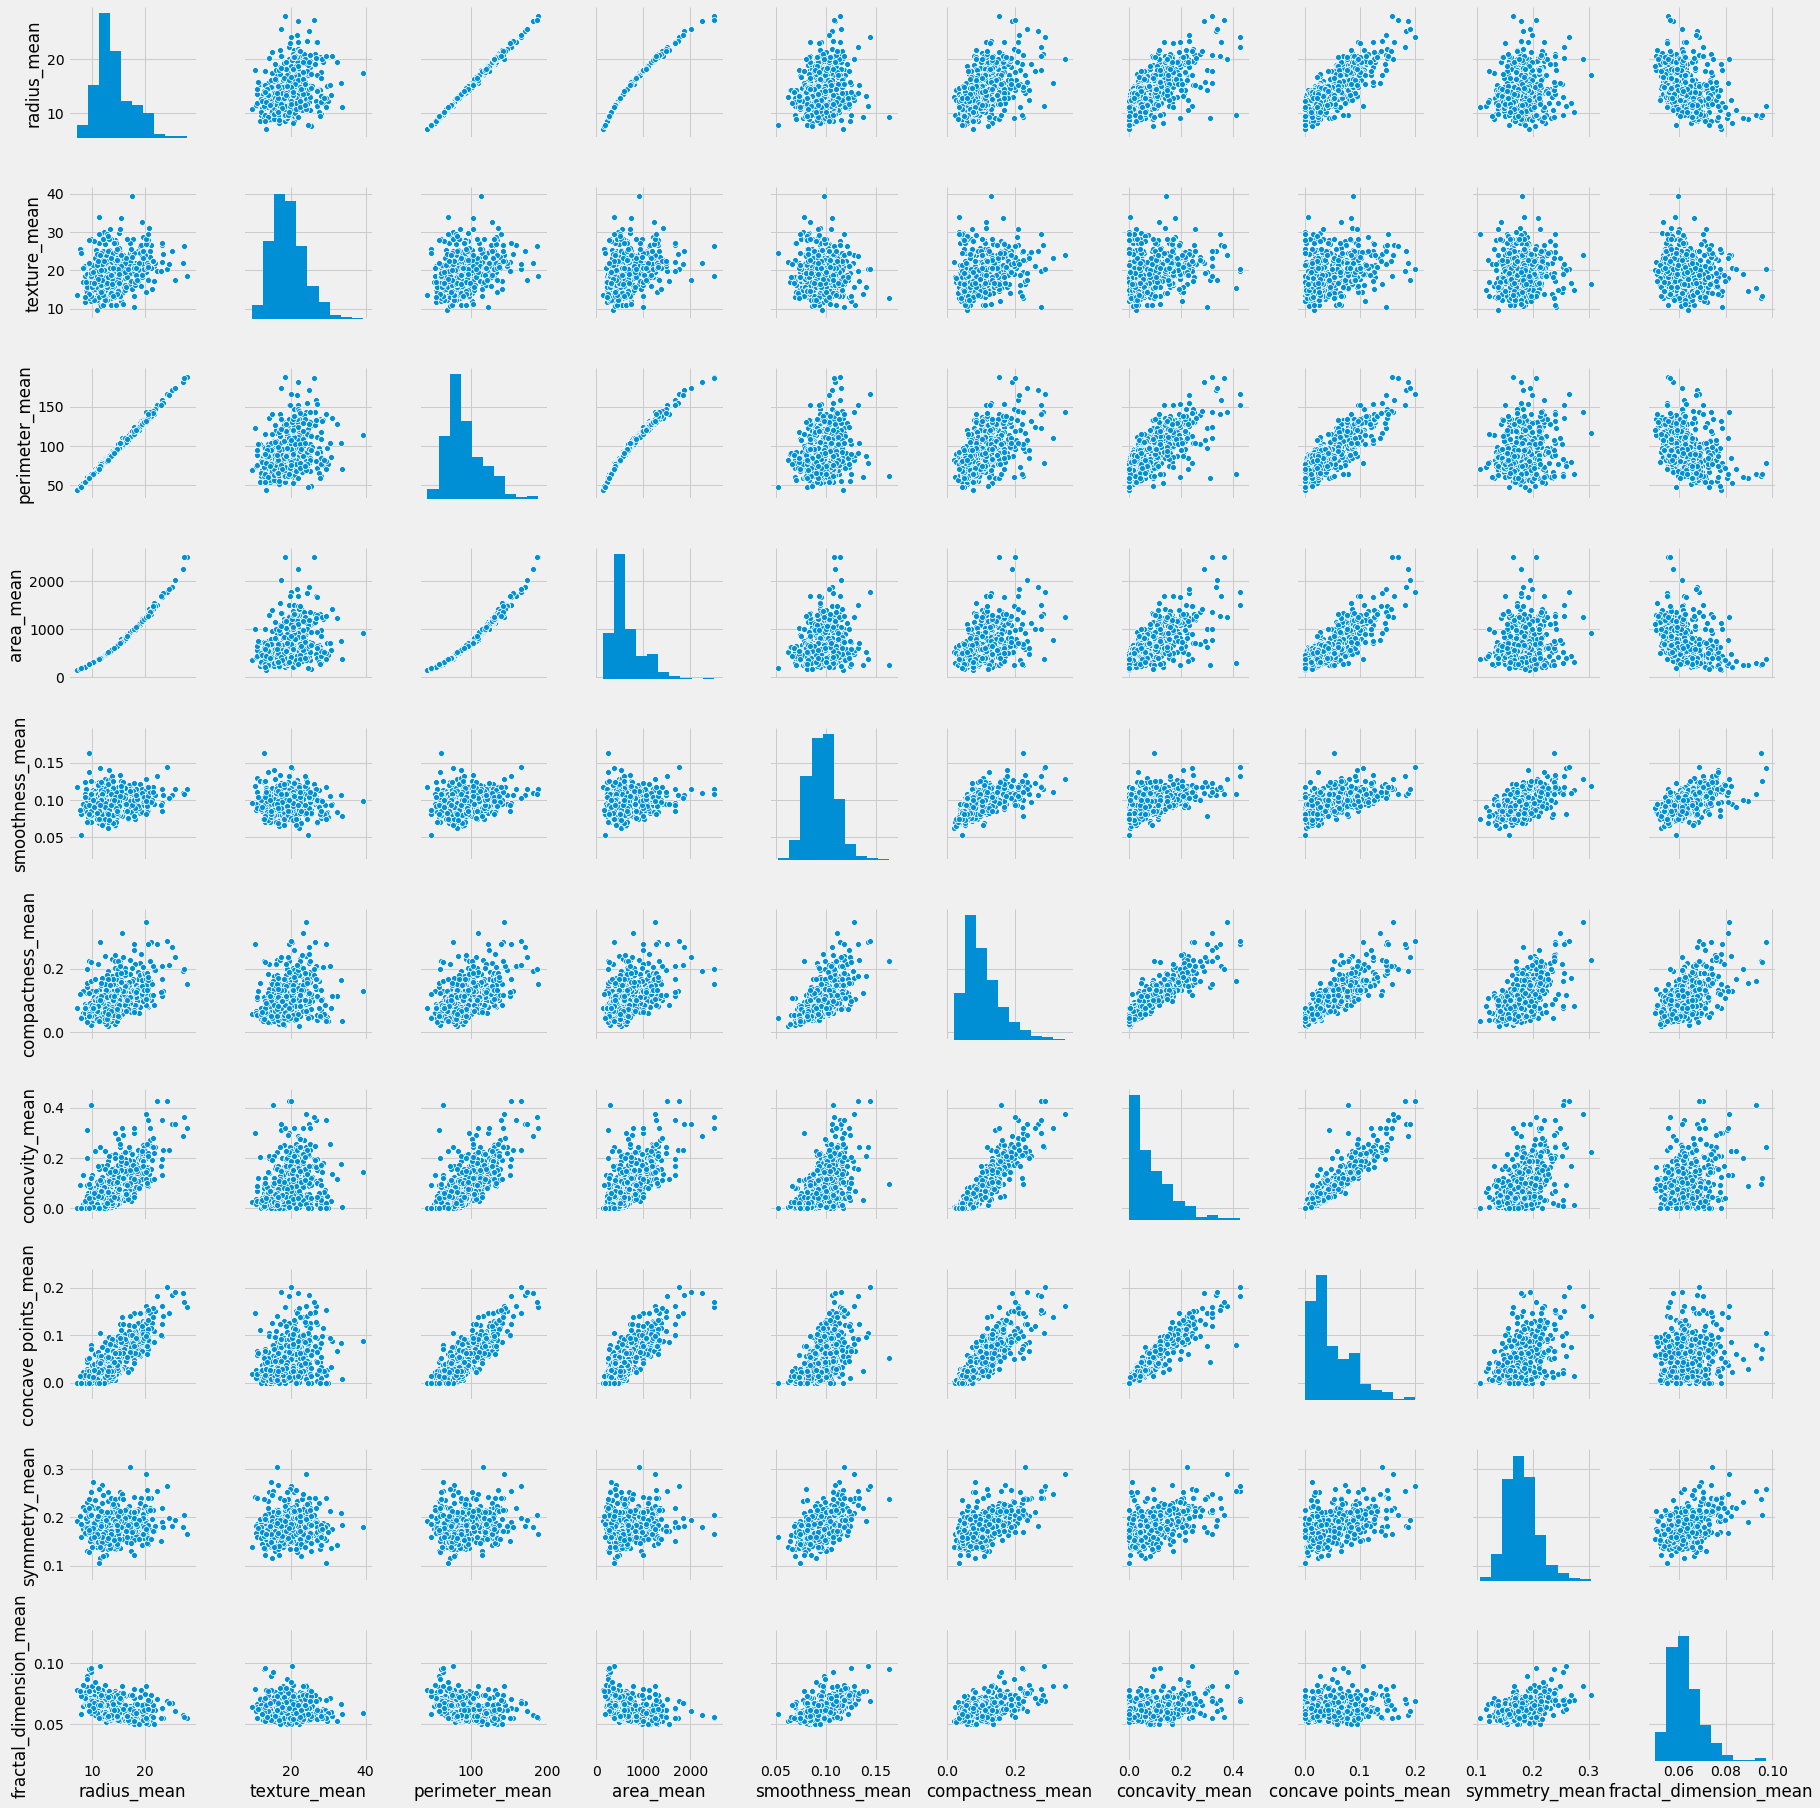

In [12]:
sns.pairplot(data.iloc[:, 1:11]);

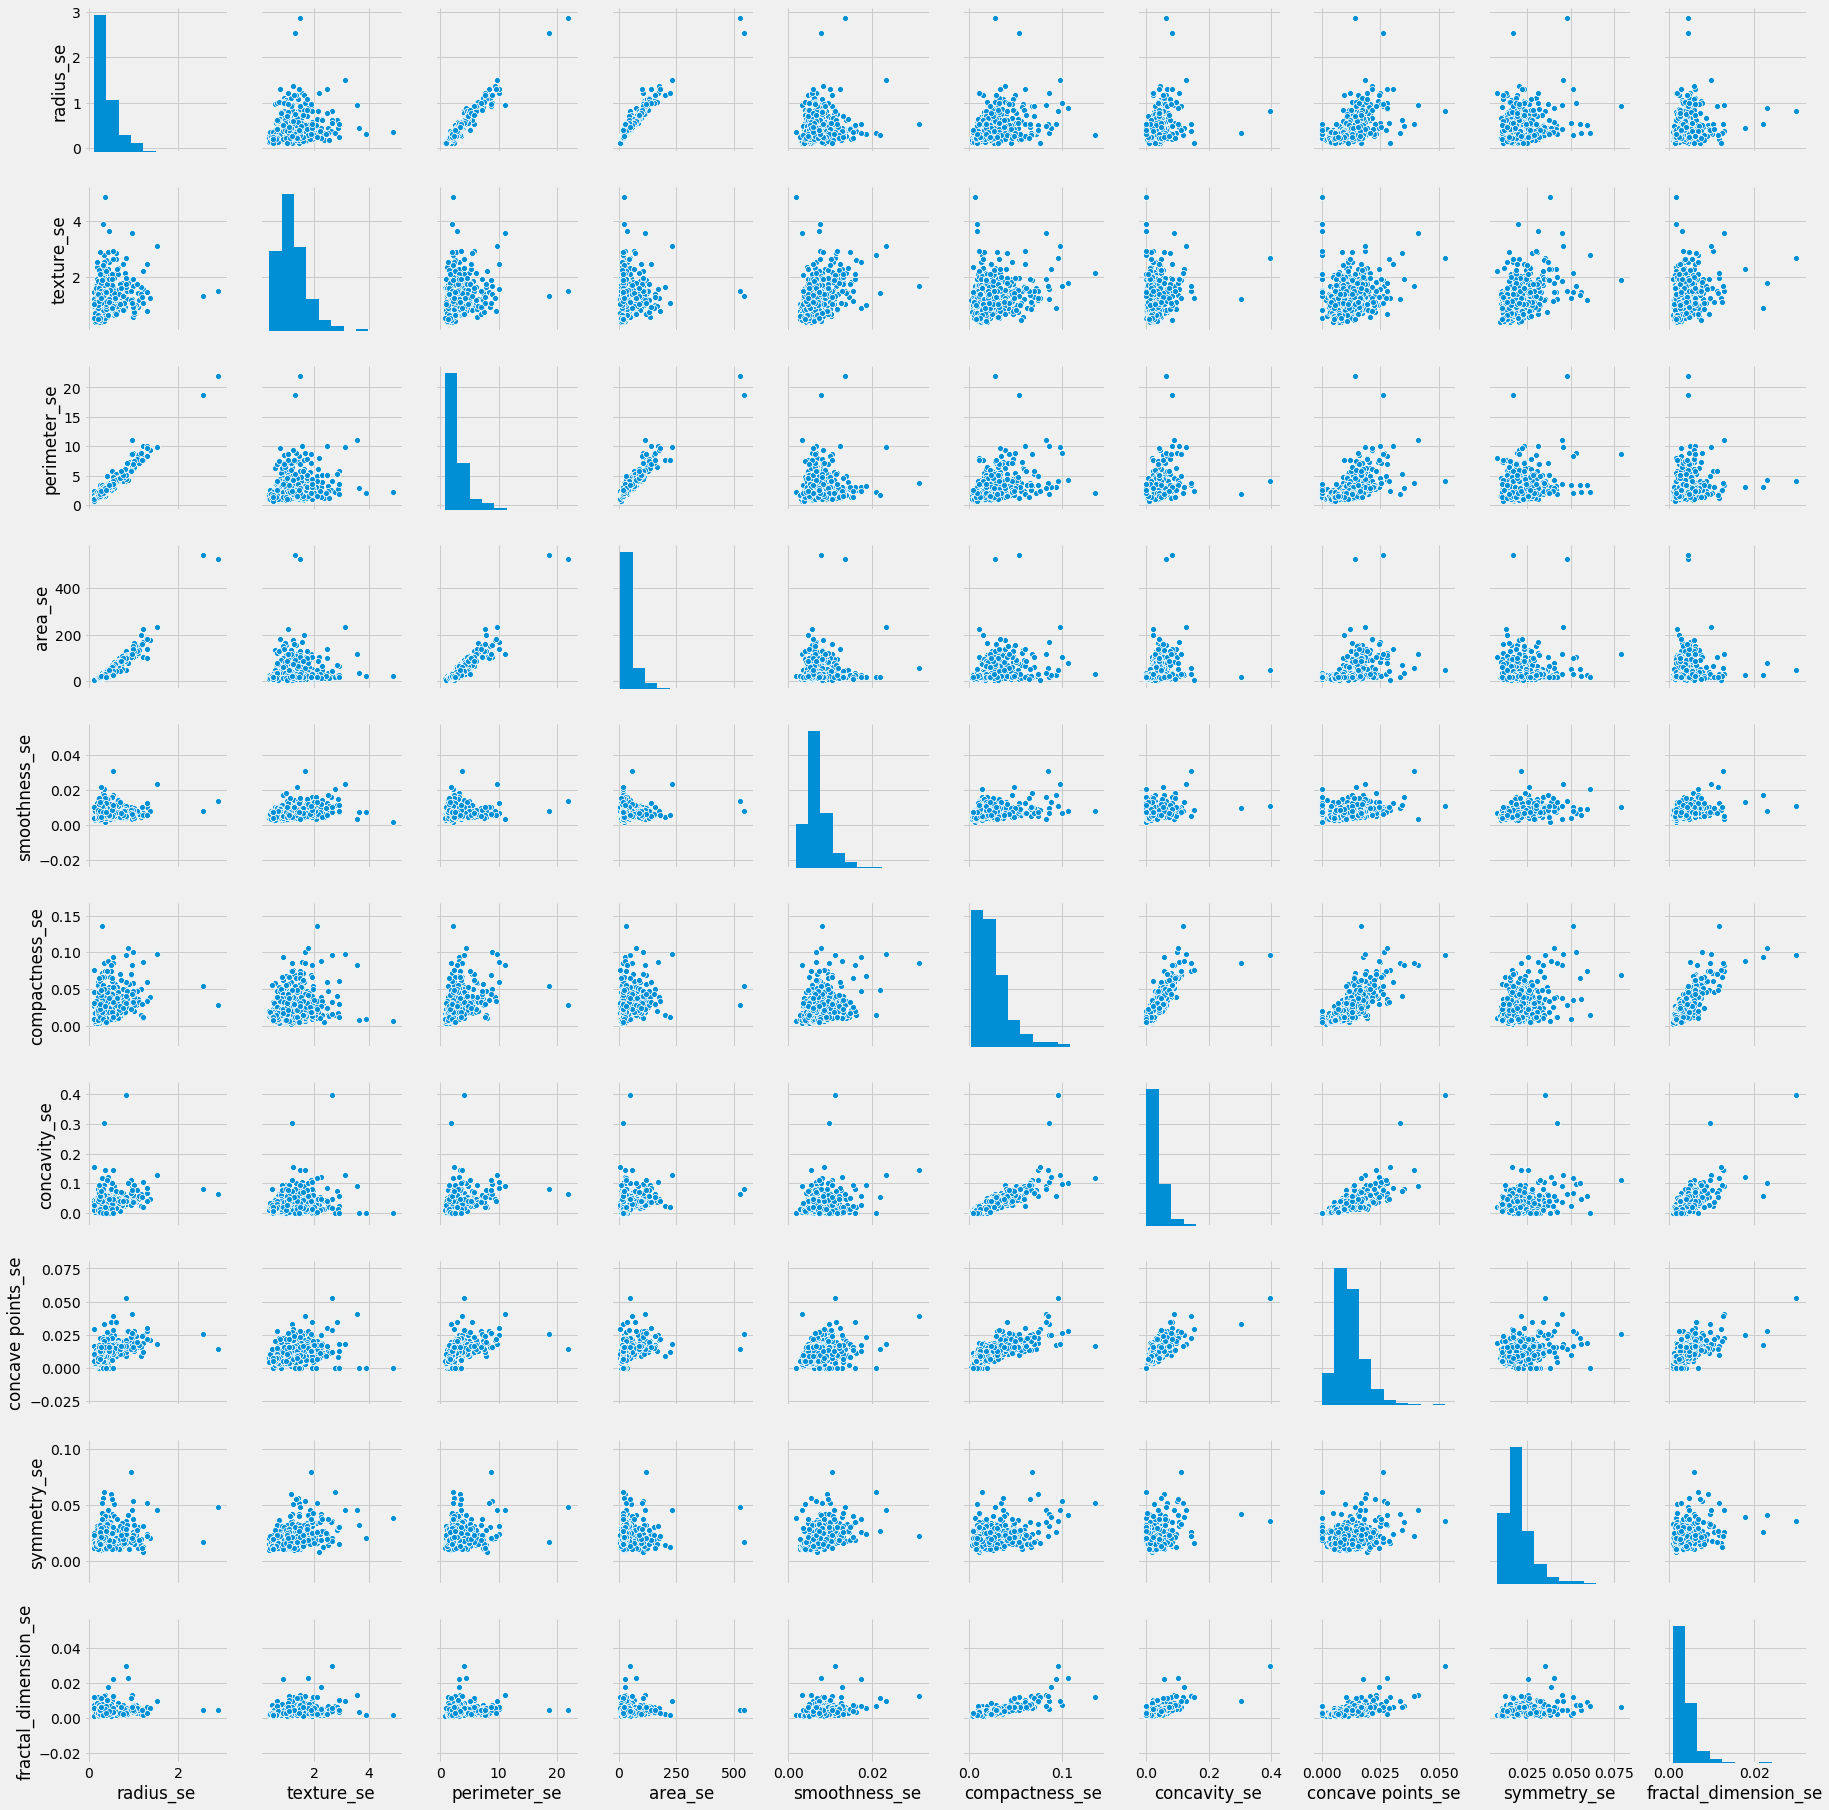

In [13]:
sns.pairplot(data.iloc[:, 11:21]);

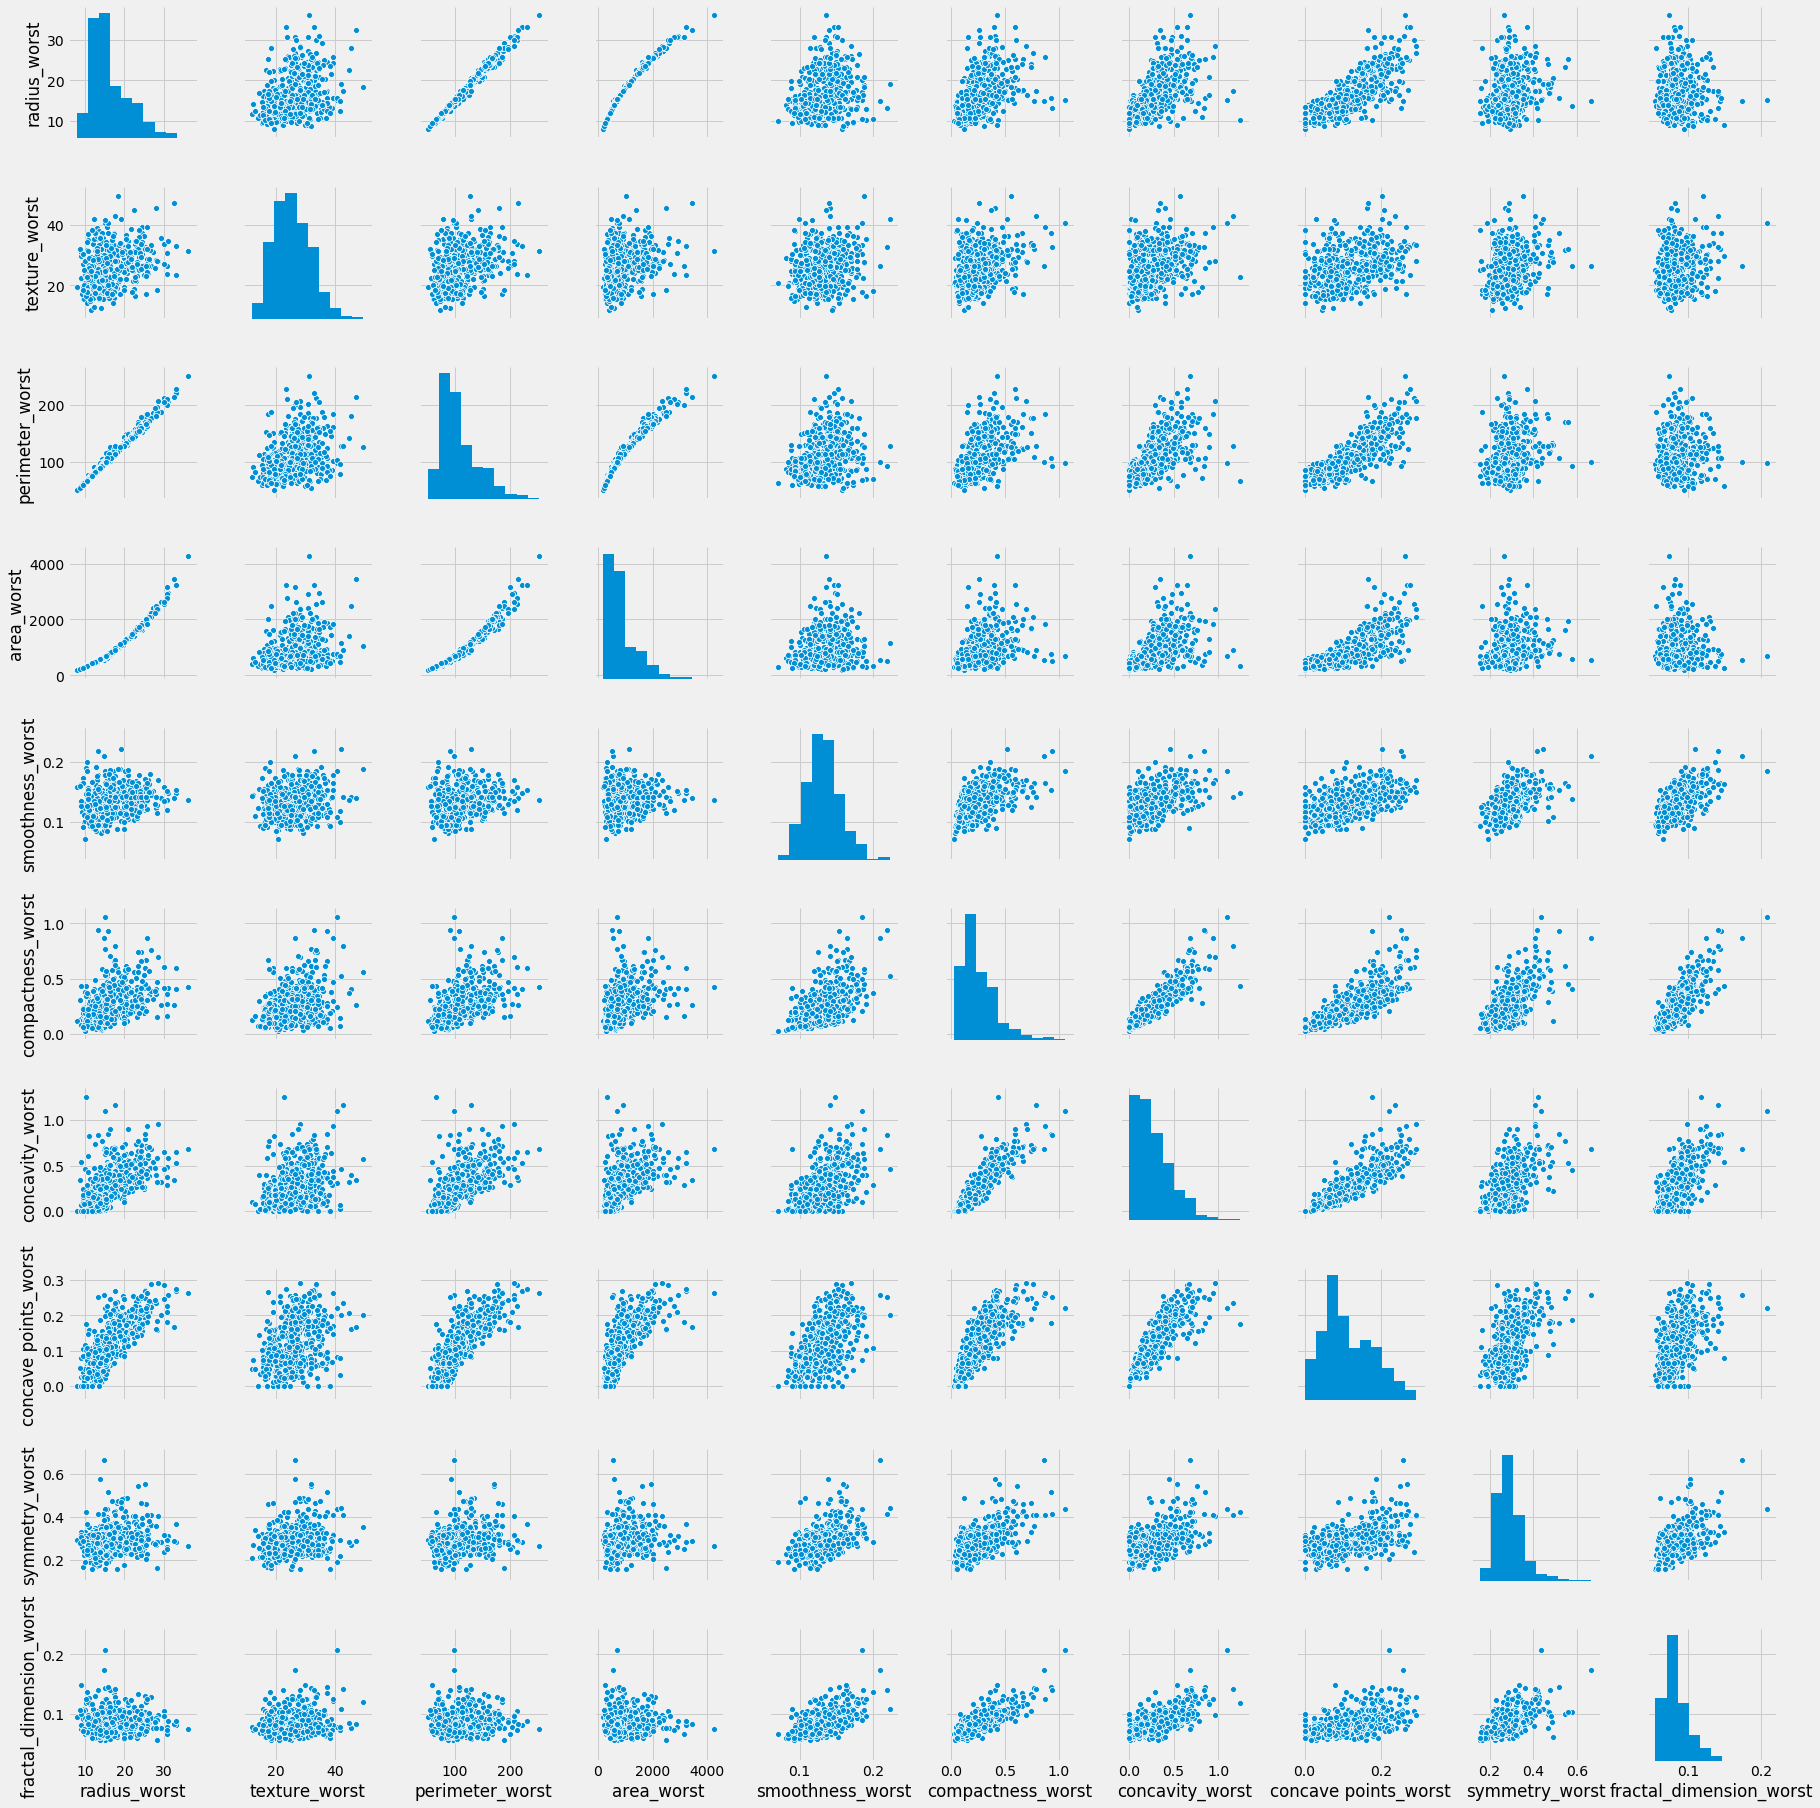

In [14]:
sns.pairplot(data.iloc[:, 21:31]);

Let's split our data as X and y.

In [15]:
independents = ['concave points_mean', 'area_worst', 'perimeter_worst', 'radius_worst', 
                'area_mean', 'perimeter_mean', 'radius_mean']
X = data[independents]
y = data['diagnosis']

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Before we build our model with SVM, we should first implement StandarScaler method.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 0)

In [18]:
standart_scaler = StandardScaler()
X_train_svm = standart_scaler.fit_transform(X_train)
X_test_svm = standart_scaler.transform(X_test)

## SVC

Since we have a lot parameters for SVC, we can use gridsearchCV to find the best parameter.

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [20]:
gscv = GridSearchCV(svm.SVC(gamma = 'auto'), { 'C' : [1, 10, 20],
                                             'kernel' : ['rbf', 'linear', 'sigmoid'],
                                             }, cv = 5, return_train_score=False)
gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 20],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [21]:
gscv.cv_results_

{'mean_fit_time': array([1.28193855e-02, 1.32793908e+00, 5.65409660e-03, 8.96954536e-03,
        5.36116290e+00, 4.46462631e-03, 9.01484489e-03, 4.57795548e+00,
        4.52647209e-03]),
 'std_fit_time': array([2.30564481e-03, 2.08434104e-01, 1.64420835e-03, 5.54961432e-05,
        1.98639192e+00, 3.89366082e-05, 1.24203312e-04, 2.07913825e+00,
        7.48624619e-05]),
 'mean_score_time': array([0.00335522, 0.00146728, 0.00201259, 0.00197105, 0.00161076,
        0.0016398 , 0.00196681, 0.00138655, 0.00167494]),
 'std_score_time': array([8.91031870e-04, 7.00469403e-05, 7.14798791e-04, 1.19869312e-05,
        2.96709292e-04, 3.99324858e-05, 1.13569358e-05, 1.60007112e-06,
        4.43761988e-05]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10, 20, 20, 20],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'sigmoid', 'rbf', 'l

Looks complicated. Let's give it a good look.

In [22]:
gscv_df = pd.DataFrame(gscv.cv_results_)
gscv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012819,0.002306,0.003355,0.000891,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4
1,1.327939,0.208434,0.001467,0.000070,1,linear,"{'C': 1, 'kernel': 'linear'}",0.921053,0.956140,0.964912,0.929825,0.955752,0.945536,0.016962,1
2,0.005654,0.001644,0.002013,0.000715,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4
3,0.008970,0.000055,0.001971,0.000012,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4
4,5.361163,1.986392,0.001611,0.000297,10,linear,"{'C': 10, 'kernel': 'linear'}",0.921053,0.956140,0.947368,0.938596,0.946903,0.942012,0.011859,3
5,0.004465,0.000039,0.001640,0.000040,10,sigmoid,"{'C': 10, 'kernel': 'sigmoid'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4
6,0.009015,0.000124,0.001967,0.000011,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4
7,4.577955,2.079138,0.001387,0.000002,20,linear,"{'C': 20, 'kernel': 'linear'}",0.947368,0.956140,0.947368,0.938596,0.938053,0.945505,0.006683,2
8,0.004526,0.000075,0.001675,0.000044,20,sigmoid,"{'C': 20, 'kernel': 'sigmoid'}",0.622807,0.622807,0.631579,0.631579,0.628319,0.627418,0.003949,4


In [23]:
gscv_df[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.627418
1,1,linear,0.945536
2,1,sigmoid,0.627418
3,10,rbf,0.627418
4,10,linear,0.942012
5,10,sigmoid,0.627418
6,20,rbf,0.627418
7,20,linear,0.945505
8,20,sigmoid,0.627418


In [36]:
gscv.best_score_

0.9455364073901567

In [37]:
gscv.best_params_

{'C': 1, 'kernel': 'linear'}

Best parameters for SVC are C : 1, kernel : 'linear with test score %94.5.

In [24]:
svm_model = svm.SVC(gamma = 'auto', C = 1, kernel='linear')
svm_model.fit(X_train_svm, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
from sklearn.metrics import accuracy_score
svm_pred = svm_model.predict(X_test_svm)

In [57]:
print(f"confusion matrix : \n {confusion_matrix(svm_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(svm_pred, y_test)}")

confusion matrix : 
 [[117   7]
 [  4  60]]
accuracy score of the model : 0.9414893617021277


## Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
accuracy_score(log_pred, y_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9468085106382979

In [33]:
from sklearn.metrics import confusion_matrix

Confusion matrix for Logistic Regression model.

In [34]:
confusion_matrix(log_pred, y_test)

array([[114,   3],
       [  7,  64]])

## Random Forest Classifier

#### Let's try with different models with different hyperparameters.

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

Specify the models and its parameters for our algorithms.

In [39]:
model_params = {'random_forest' : {'model' : RandomForestClassifier(), 'params' : {'n_estimators' : [1, 5, 10] }},
               'logistic_regression' : {'model' : LogisticRegression(solver='liblinear', multi_class = 'auto'),
                'params' : {'C' : [1, 5, 10]}
               }}

In [40]:
scores = []
for model_name, model_param in model_params.items():
    grid = GridSearchCV(model_param['model'], model_param['params'],
                       cv = 5, return_train_score=False)
    grid.fit(X, y)
    scores.append({
        'model' : model_name,
        'best_score' : grid.best_score_,
        'best_params' : grid.best_params_
    })

df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,random_forest,0.938519,{'n_estimators': 10}
1,logistic_regression,0.945521,{'C': 5}


#### Random Forest Classifier with the best parameters.

In [41]:
Random_forest = RandomForestClassifier(n_estimators=10)
Random_forest.fit(X_train, y_train)
randomforest_pred = Random_forest.predict(X_test)

In [53]:
print(f"confusion matrix : \n {confusion_matrix(randomforest_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(randomforest_pred, y_test)}")

confusion matrix : 
 [[113   4]
 [  8  63]]
accuracy score of the model : 0.9361702127659575


#### Logistic Regression with the best parameters.

In [51]:
log_model_2 = LogisticRegression(C = 5)
log_model_2.fit(X_train, y_train)
log_model_2_pred = log_model_2.predict(X_test)

In [52]:
print(f"confusion matrix : \n {confusion_matrix(log_model_2_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(log_model_2_pred, y_test)}")

confusion matrix : 
 [[115   3]
 [  6  64]]
accuracy score of the model : 0.9521276595744681


## KNN

In [46]:
gscv_kneigh = GridSearchCV(KNeighborsClassifier(), { 'n_neighbors' : [5,7,9,10,20,30],
                                             'weights' : ["uniform","distance"],
                                            'metric' : ["euclidean","manhattan","minkowski"]
                                             }, cv = 5, return_train_score=False)
gscv_kneigh.fit(X, y)
print(f"Best score of the parameters : {gscv_kneigh.best_score_}")
params = gscv_kneigh.best_params_
print(f"Best parameters : {params}")

Best score of the parameters : 0.9349945660611706
Best parameters : {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}


#### Make predictions with the best parameters.

In [50]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(f"confusion matrix : \n {confusion_matrix(knn_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(knn_pred, y_test)}")

confusion matrix : 
 [[117   4]
 [  4  63]]
accuracy score of the model : 0.9574468085106383


### Final Look

In [59]:
print('SVC Model Results')
print(f"confusion matrix : \n {confusion_matrix(svm_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(svm_pred, y_test)}\n")

print('Random Forest Classifier Results')
print(f"confusion matrix : \n {confusion_matrix(randomforest_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(randomforest_pred, y_test)}\n")

print('Logistic Regression Results')
print(f"confusion matrix : \n {confusion_matrix(log_model_2_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(log_model_2_pred, y_test)}\n")

print("KNN Results")
print(f"confusion matrix : \n {confusion_matrix(knn_pred, y_test)}")
print(f"accuracy score of the model : {accuracy_score(knn_pred, y_test)}")

SVC Model Results
confusion matrix : 
 [[117   7]
 [  4  60]]
accuracy score of the model : 0.9414893617021277

Random Forest Classifier Results
confusion matrix : 
 [[113   4]
 [  8  63]]
accuracy score of the model : 0.9361702127659575

Logistic Regression Results
confusion matrix : 
 [[115   3]
 [  6  64]]
accuracy score of the model : 0.9521276595744681

KNN Results
confusion matrix : 
 [[117   4]
 [  4  63]]
accuracy score of the model : 0.9574468085106383


* SVC model got 7 + 4 = 11 wrong.
* Random Forest Classifier got 8 + 4 = 12 wrong.
* Logistic Regression got 6 + 3 = 9 wrong.
* KNN got 4 + 4 = 8 wrong.
### KNN looks more convinient.